# Performance on IBC Data

In [1]:
import numpy as np
import pandas as pd

In [5]:
liby,libx = combiner('lib',2100)
cony,conx = combiner('con',1800)
neuy,neux = combiner('neutral',700)
x = libx+conx+neux
y = liby+cony+neuy
    
true_x = [func(i.split(', '),'mean') for i in x]

In [6]:
true_x = [func(i.split(', '),'mean') for i in x]
with open('means.csv','w') as f:
    f.write('leaning,label\n')
    for i,j in zip(true_x,y):
        f.write(str(i)+','+str(j)+'\n')

true_x = [func(i.split(', '),'max') for i in x]
with open('maxes.csv','w') as f:
    f.write('leaning,label\n')
    for i,j in zip(true_x,y):
        f.write(str(i)+','+str(j)+'\n')
        
true_x = [func(i.split(', '),'min') for i in x]
with open('mins.csv','w') as f:
    f.write('leaning,label\n')
    for i,j in zip(true_x,y):
        f.write(str(i)+','+str(j)+'\n')

In [7]:
df0 = pd.read_csv('means.csv')
df1 = pd.read_csv('maxes.csv')
df2 = pd.read_csv('mins.csv')

# Performance Across Aggregate Functions

When **Mean** was used as an aggregate function, we can see that while it was able to generally distinguish conservative and liberal language from each other, it generally was unable to distinguish the conservative and neutral sentences.

Additionally, there is a large amount of overlap

label
con    AxesSubplot(0.125,0.125;0.775x0.755)
lib    AxesSubplot(0.125,0.125;0.775x0.755)
Name: leaning, dtype: object

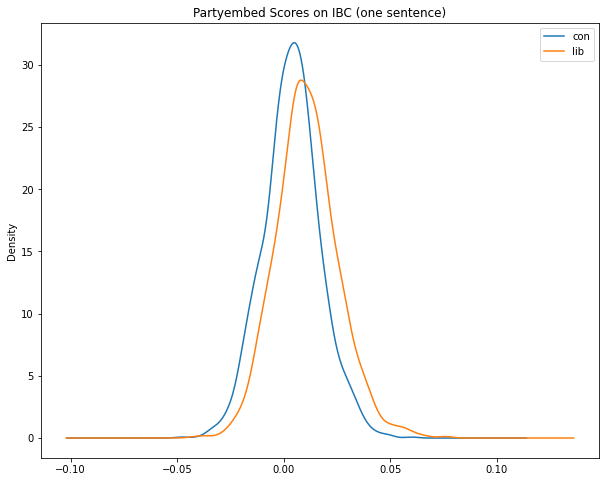

In [8]:
df0[df0['label'] != 'neutral'].groupby('label')['leaning'].plot(kind='kde', figsize=(10,8), legend=True, title='Partyembed Scores on IBC (one sentence)')

In [9]:
libs_ratings = []
libs_titles = []
for i in np.arange(500):
    libs_ratings.append(np.mean(np.random.choice(df0[df0['label'] == 'lib']['leaning'],30)))
    libs_titles.append('lib')
cons_ratings = []
cons_titles = []
for i in np.arange(500):
    cons_ratings.append(np.mean(np.random.choice(df0[df0['label'] == 'con']['leaning'],30)))
    cons_titles.append('con')

In [10]:
ndf = pd.DataFrame({'leaning':libs_ratings + cons_ratings, 'label':libs_titles+cons_titles})

label
con    AxesSubplot(0.125,0.125;0.775x0.755)
lib    AxesSubplot(0.125,0.125;0.775x0.755)
Name: leaning, dtype: object

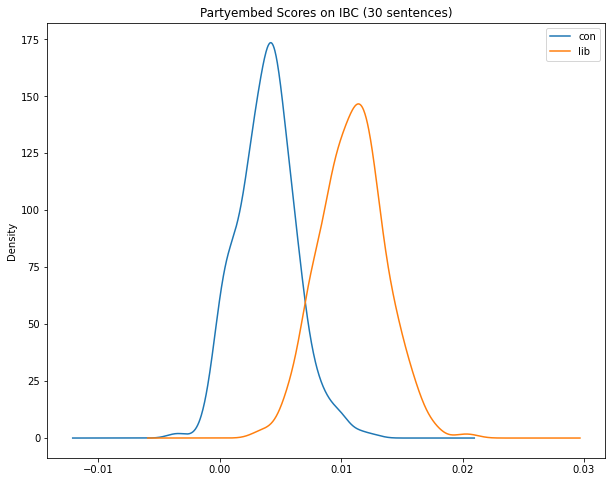

In [11]:
ndf.groupby('label')['leaning'].plot(kind='kde', figsize=(10,8), legend=True, title='Partyembed Scores on IBC (30 sentences)')

label
con    AxesSubplot(0.125,0.125;0.775x0.755)
lib    AxesSubplot(0.125,0.125;0.775x0.755)
Name: leaning, dtype: object

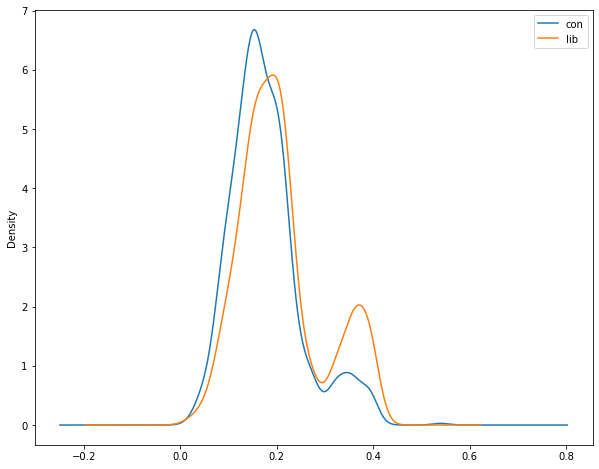

In [12]:
df1[df1['label'] != 'neutral'].groupby('label')['leaning'].plot(kind='kde', figsize=(10,8), legend=True)

label
con    AxesSubplot(0.125,0.125;0.775x0.755)
lib    AxesSubplot(0.125,0.125;0.775x0.755)
Name: leaning, dtype: object

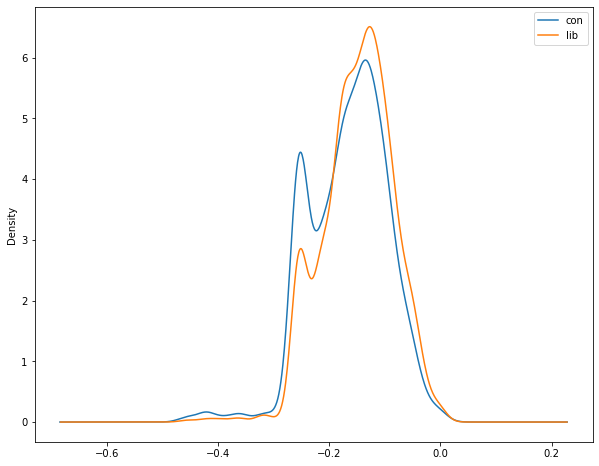

In [13]:
df2[df2['label'] != 'neutral'].groupby('label')['leaning'].plot(kind='kde', figsize=(10,8), legend=True)

In [2]:
def combiner(prefix, number):
    '''
    This function converts a set of tsvs into labels and items.
    '''
    starter = ''
    labels = []
    items = []
    started = False
    for i in np.arange(100,number,100):
        title = prefix + str(i) + '.tsv' #create filename
        with open(title, 'r') as f:
            while True:
                line = f.readline()
                if not line:
                    break
                if not started:
                    started = True
                    starter = line.split('[')[1].strip() + ' ' #account for first line special case
                    continue
                if (line[0] == 'N'): #if in the middle of a line
                    starter += line.strip() + ' ' #append to your current WIP
                else:
                    labels.append(prefix) #otherwise append everything
                    items.append(starter.replace('Name: dem, dtype: float64,', 'dem').replace('Name: rep, dtype: float64)', 'rep').replace('71    ','').replace('71   ','').replace('(',''))
                    starter = line.split('[')[1].strip() + ' ' #and restart
    return labels, items

def func(nums, function = 'mean'):
    '''
    This function returns the aggregate function on the items
    '''
    fixed = []
    for i in nums: #extract numbers
        if len(i) > 5:
            d,r = i.split(' dem ')[0], i.split(' dem ')[1].split(' rep')[0]
            fixed.append(float(d) - float(r))
        else:
            fixed.append(0)
    if function == 'mean': #perform aggregate function
        return np.mean(fixed)
    elif function == 'max':
        return np.max(fixed)
    else:
        return np.min(fixed)

In [3]:
def combiner(prefix, number):
    starter = ''
    labels = []
    items = []
    started = False
    for i in np.arange(100,number,100):
        title = prefix + str(i) + '.tsv'
        with open(title, 'r') as f:
            while True:
                line = f.readline()
                if not line:
                    break
                #count += 1
                #if count >= 200:
                #    break
                #print(line)
                if not started:
                    started = True
                    starter = line.split('[')[1].strip() + ' '
                    continue
                if (line[0] == 'N'):
                    starter += line.strip() + ' '
                else:
                    labels.append(prefix)
                    items.append(starter.replace('Name: dem, dtype: float64,', 'dem').replace('Name: rep, dtype: float64)', 'rep').replace('71    ','').replace('71   ','').replace('(',''))
                    starter = line.split('[')[1].strip() + ' '
    return labels, items

In [4]:
def mean_func(nums):
    fixed = []
    for i in nums:
        if len(i) > 5:
            d,r = i.split(' dem ')[0], i.split(' dem ')[1].split(' rep')[0]
            fixed.append(float(d) - float(r))
        else:
            fixed.append(0)
    return np.max(fixed)